# **Step 01. 월별 이용량 분석 및 대상 월 선별**

- "어떤 달을 분석 대상으로 고를지"
- 2024년 1월 ~ 12월 데이터 사용
- https://data.seoul.go.kr/dataList/OA-14994/F/1/datasetView.do

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
REPORT_DIR = "./reports"
os.makedirs(REPORT_DIR, exist_ok=True)

## 1. 파일 병합 및 저장

In [7]:
RAW1 = "./data/raw/서울특별시_공공자전거_대여소별_이용정보(월별)_24.1-6.csv"
RAW2 = "./data/raw/서울특별시_공공자전거_대여소별_이용정보(월별)_24.7-12.csv"
OUTPUT_DATA = "./data/working/서울특별시_공공자전거_대여소별_이용정보(월별)_2024년_통합.csv"


if os.path.exists(OUTPUT_DATA):
    print("이미 존재합니다. : ", OUTPUT_DATA)
else:
    # CSV 불러오기
    df1 = pd.read_csv(RAW1, encoding="cp949")
    df2 = pd.read_csv(RAW2, encoding="cp949")

    # 파일 합치기
    df_merged = pd.concat([df1, df2], ignore_index=True)

    # 합친 데이터 저장
    df_merged.to_csv(OUTPUT_DATA, index=False, encoding="utf-8-sig")

    print("저장 완료:", OUTPUT_DATA)

이미 존재합니다. :  ./data/working/서울특별시_공공자전거_대여소별_이용정보(월별)_2024년_통합.csv


## 2. 데이터 확인

In [10]:
file = "./data/working/서울특별시_공공자전거_대여소별_이용정보(월별)_2024년_통합.csv"
df = pd.read_csv(file, encoding="utf-8-sig")

In [12]:
df.head()

,자치구,대여소명,기준년월,대여건수,반납건수
0,강남구,2301. 현대고등학교 건너편,202401,332,356
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202401,517,500
2,강남구,2303. 논현역 10번출구,202401,554,512
3,강남구,2304. 대현그린타워,202401,131,72
4,강남구,2305. MCM 본사 직영점 앞,202401,169,174


In [14]:
df.tail()

,자치구,대여소명,기준년월,대여건수,반납건수
32781,중랑구,4846. 상봉동양엔파트 앞,202411,689,698
32782,중랑구,4846. 상봉동양엔파트 앞,202412,428,419
32783,중랑구,4847. 신내역시티프라디움 앞,202410,341,350
32784,중랑구,4847. 신내역시티프라디움 앞,202411,555,542
32785,중랑구,4847. 신내역시티프라디움 앞,202412,348,316


In [16]:
df.shape

(32786, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32786 entries, 0 to 32785
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     32786 non-null  object
 1   대여소명    32786 non-null  object
 2   기준년월    32786 non-null  int64 
 3   대여건수    32786 non-null  int64 
 4   반납건수    32786 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ MB


## 3. 월별 총이용건수 (대여건수, 반납건수, 대여+반납)

In [21]:
monthly_sum = df.groupby("기준년월")[["대여건수", "반납건수"]].sum().reset_index()
monthly_sum["총이용건수"] = monthly_sum["대여건수"] + monthly_sum["반납건수"]

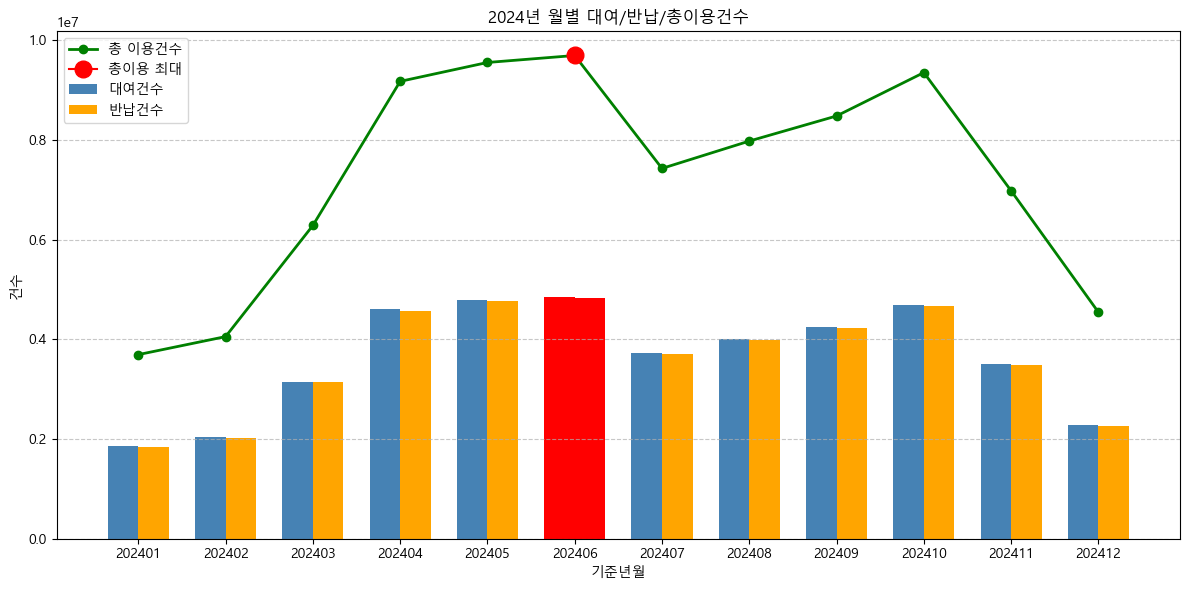

In [25]:
fig, ax1 = plt.subplots(figsize=(12,6))

width = 0.35
x = np.arange(len(monthly_sum["기준년월"]))

# 최대값 인덱스
idx_max_rent   = monthly_sum["대여건수"].idxmax()
idx_max_return = monthly_sum["반납건수"].idxmax()
idx_max_total  = monthly_sum["총이용건수"].idxmax()

# 막대: 대여건수
colors_rent = ["red" if i==idx_max_rent else "steelblue" for i in monthly_sum.index]
ax1.bar(x - width/2, monthly_sum["대여건수"], width, label="대여건수", color=colors_rent)

# 막대: 반납건수
colors_return = ["red" if i==idx_max_return else "orange" for i in monthly_sum.index]
ax1.bar(x + width/2, monthly_sum["반납건수"], width, label="반납건수", color=colors_return)

ax1.set_xlabel("기준년월")
ax1.set_ylabel("건수")
ax1.set_xticks(x)
ax1.set_xticklabels(monthly_sum["기준년월"])

# 라인: 총이용건수
ax1.plot(x, monthly_sum["총이용건수"], marker="o", color="green", linewidth=2, label="총 이용건수")
ax1.plot(x[idx_max_total], monthly_sum.loc[idx_max_total,"총이용건수"], marker="o", color="red", markersize=12, label="총이용 최대")

plt.title("2024년 월별 대여/반납/총이용건수")
ax1.legend(loc="upper left")
ax1.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(REPORT_DIR, "01_monthly_rent_return_total.png"), dpi=300)
plt.show()